In [1]:
import pandas as pd
dt=pd.read_csv("letter-recognition.csv")
dt.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [2]:
#Data Preparation
X=dt.drop(columns=['letter'])
Y=dt['letter']
#Data Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
#Model Building
from sklearn import svm
model=svm.SVC(kernel='linear')    
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [10]:
from sklearn.metrics import accuracy_score

# Initialize SVM classifier with RBF kernel
model_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale') 

# Train model on scaled training data
model_rbf.fit(X_train, Y_train)

# Predict on test set
y_test_pred = model_rbf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy with RBF kernel: {:.2f}%".format(accuracy * 100))


Accuracy with RBF kernel: 94.92%


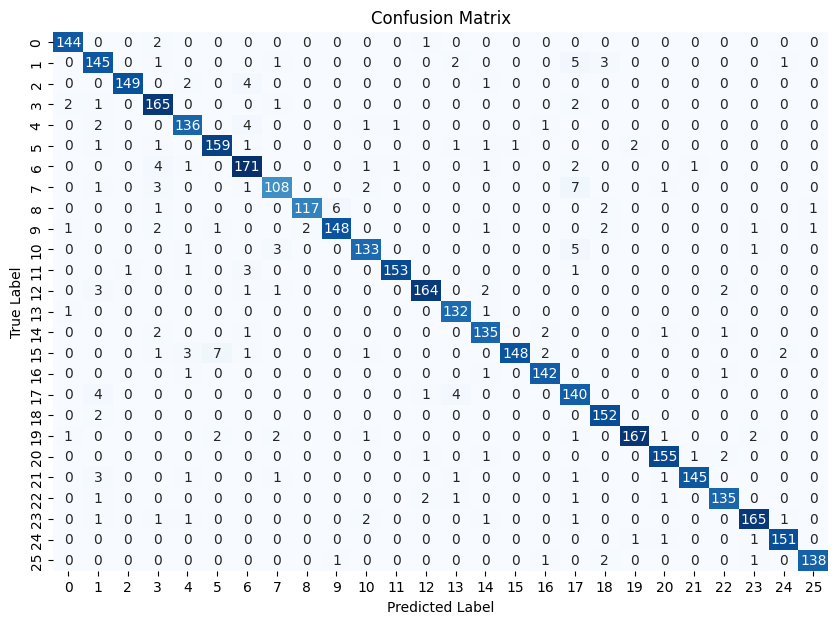

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)  # 'fmt="d"' means decimal format
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [14]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, y_test_pred)

for idx, (prec, rec, f_score) in enumerate(zip(precision, recall, f1)):
    print(f"Class {idx}: Precision = {prec:.2f}, Recall = {rec:.2f}, F1-Score = {f_score:.2f}")


Class 0: Precision = 0.97, Recall = 0.98, F1-Score = 0.97
Class 1: Precision = 0.88, Recall = 0.92, F1-Score = 0.90
Class 2: Precision = 0.99, Recall = 0.96, F1-Score = 0.97
Class 3: Precision = 0.90, Recall = 0.96, F1-Score = 0.93
Class 4: Precision = 0.93, Recall = 0.94, F1-Score = 0.93
Class 5: Precision = 0.94, Recall = 0.95, F1-Score = 0.95
Class 6: Precision = 0.91, Recall = 0.94, F1-Score = 0.93
Class 7: Precision = 0.92, Recall = 0.88, F1-Score = 0.90
Class 8: Precision = 0.98, Recall = 0.92, F1-Score = 0.95
Class 9: Precision = 0.95, Recall = 0.93, F1-Score = 0.94
Class 10: Precision = 0.94, Recall = 0.93, F1-Score = 0.94
Class 11: Precision = 0.99, Recall = 0.96, F1-Score = 0.97
Class 12: Precision = 0.97, Recall = 0.95, F1-Score = 0.96
Class 13: Precision = 0.94, Recall = 0.99, F1-Score = 0.96
Class 14: Precision = 0.93, Recall = 0.95, F1-Score = 0.94
Class 15: Precision = 0.99, Recall = 0.90, F1-Score = 0.94
Class 16: Precision = 0.96, Recall = 0.98, F1-Score = 0.97
Class 1

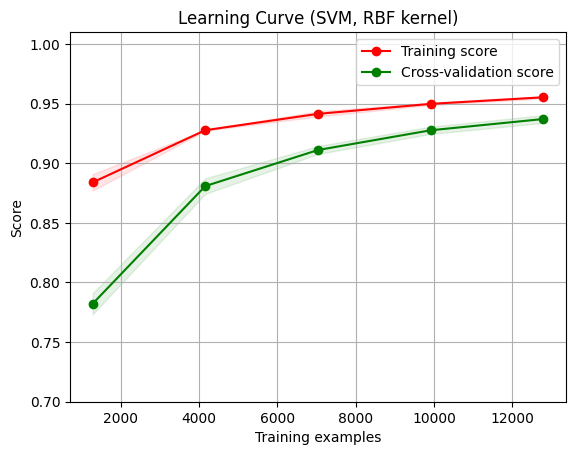

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to calculate and plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Generate the plot
title = "Learning Curve (SVM, RBF kernel)"
cv = 5  # CV strategy
plot = plot_learning_curve(model_rbf, title, X_train, Y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plot.show()
